In [6]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import gymnasium as gym
import highway_env

In [2]:
# Inline display trick
import time
import os
from IPython.display import clear_output

In [4]:
import pickle

with open("../configs/config3.pkl", "rb") as f:
    config = pickle.load(f)


In [ ]:
import os, pickle, shutil, time
import gymnasium as gym
import highway_env                   # enregistre les env « *v0 »
from stable_baselines3 import PPO    # ou A2C/SAC…
from stable_baselines3.common.env_util import make_vec_env
import matplotlib.pyplot as plt

LOG_DIR   = "../logs/racetrack_ppo"
MODEL_DIR = "../models"
MODEL_TAG = "ppo_racetrack"

os.makedirs(LOG_DIR, exist_ok=True)
os.makedirs(MODEL_DIR, exist_ok=True)


In [ ]:
with open("../configs/config3.pkl", "rb") as f:
    cfg = pickle.load(f)

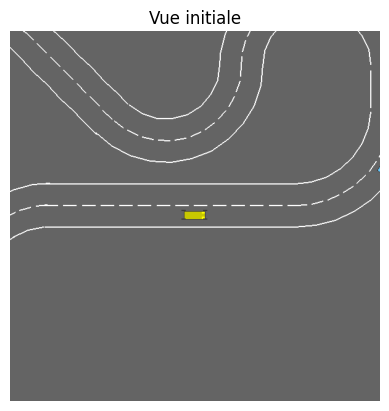

In [4]:
env_vis = gym.make("racetrack-v0", render_mode="rgb_array")
env_vis.unwrapped.configure(cfg)
obs, _ = env_vis.reset()
frame = env_vis.render()


plt.imshow(frame)
plt.axis("off")
plt.title("Vue initiale")
plt.show()

env_vis.close()


In [ ]:
N_ENVS = 2          
vec_env = make_vec_env(
        "racetrack-v0",
        n_envs=N_ENVS,
        env_kwargs={"config": cfg},
)


### Hyperparamètres retenus
- `total_timesteps` : 400 000  
- `n_steps` (rollout par env) : 512  
- `batch_size` : 64  
- `learning_rate` : 3e-4  
- `gamma` : 0.99  


In [11]:
TOTAL_TS   = 400_000
N_STEPS    = 512
BATCH_SIZE = 64
LR         = 3e-4
GAMMA      = 0.99


In [ ]:
model = PPO(
    "MlpPolicy",
    vec_env,
    n_steps=1024,     
    batch_size=64,
    learning_rate=3e-4,
    gamma=0.99,
    tensorboard_log=LOG_DIR,
    verbose=1,
)

Using cpu device


In [12]:
start = time.time()
model.learn(total_timesteps=TOTAL_TS,
            tb_log_name="run1",
            progress_bar=True)
print("Training finished in {:.1f} min".format((time.time()-start)/60))


Logging to ../logs/racetrack_ppo\run1_1


Output()

-----------------------------
| time/              |      |
|    fps             | 23   |
|    iterations      | 1    |
|    time_elapsed    | 86   |
|    total_timesteps | 2048 |
-----------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.5e+03     |
|    ep_rew_mean          | 17.9        |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 2           |
|    time_elapsed         | 179         |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004905102 |
|    clip_fraction        | 0.0111      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.17        |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0143      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0101     |
|    std                  | 0.979       |
|    value_loss           | 0.306       |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.21e+03    |
|    ep_rew_mean          | 16.7        |
| time/                   |             |
|    fps                  | 22          |
|    iterations           | 3           |
|    time_elapsed         | 273         |
|    total_timesteps      | 6144        |
| train/                  |             |
|    approx_kl            | 0.001576106 |
|    clip_fraction        | 0.00791     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_variance   | 0.692       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.00541    |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0103     |
|    std                  | 0.967       |
|    value_loss           | 0.124       |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.06e+03     |
|    ep_rew_mean          | 18.3         |
| time/                   |              |
|    fps                  | 23           |
|    iterations           | 4            |
|    time_elapsed         | 344          |
|    total_timesteps      | 8192         |
| train/                  |              |
|    approx_kl            | 0.0068482766 |
|    clip_fraction        | 0.0311       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | 0.591        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.379        |
|    n_updates            | 30           |
|    policy_gradient_loss | -0.0152      |
|    std                  | 0.948        |
|    value_loss           | 0.623        |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 808         |
|    ep_rew_mean          | 45.1        |
| time/                   |             |
|    fps                  | 24          |
|    iterations           | 5           |
|    time_elapsed         | 417         |
|    total_timesteps      | 10240       |
| train/                  |             |
|    approx_kl            | 0.005712101 |
|    clip_fraction        | 0.0382      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.36       |
|    explained_variance   | 0.63        |
|    learning_rate        | 0.0003      |
|    loss                 | 2.69        |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.0138     |
|    std                  | 0.93        |
|    value_loss           | 4.54        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 861          |
|    ep_rew_mean          | 42.5         |
| time/                   |              |
|    fps                  | 25           |
|    iterations           | 6            |
|    time_elapsed         | 485          |
|    total_timesteps      | 12288        |
| train/                  |              |
|    approx_kl            | 0.0053718667 |
|    clip_fraction        | 0.0272       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | 0.743        |
|    learning_rate        | 0.0003       |
|    loss                 | 2.5          |
|    n_updates            | 50           |
|    policy_gradient_loss | -0.0149      |
|    std                  | 0.916        |
|    value_loss           | 5.82         |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 685          |
|    ep_rew_mean          | 46.1         |
| time/                   |              |
|    fps                  | 25           |
|    iterations           | 7            |
|    time_elapsed         | 558          |
|    total_timesteps      | 14336        |
| train/                  |              |
|    approx_kl            | 0.0010759368 |
|    clip_fraction        | 0.0105       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.34        |
|    explained_variance   | 0.726        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.017       |
|    n_updates            | 60           |
|    policy_gradient_loss | -0.00907     |
|    std                  | 0.927        |
|    value_loss           | 0.0527       |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 618         |
|    ep_rew_mean          | 53.6        |
| time/                   |             |
|    fps                  | 25          |
|    iterations           | 8           |
|    time_elapsed         | 632         |
|    total_timesteps      | 16384       |
| train/                  |             |
|    approx_kl            | 0.005587399 |
|    clip_fraction        | 0.0434      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.34       |
|    explained_variance   | 0.709       |
|    learning_rate        | 0.0003      |
|    loss                 | 5.1         |
|    n_updates            | 70          |
|    policy_gradient_loss | -0.0148     |
|    std                  | 0.921       |
|    value_loss           | 11.5        |
-----------------------------------------


----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 538        |
|    ep_rew_mean          | 65         |
| time/                   |            |
|    fps                  | 26         |
|    iterations           | 9          |
|    time_elapsed         | 704        |
|    total_timesteps      | 18432      |
| train/                  |            |
|    approx_kl            | 0.00677013 |
|    clip_fraction        | 0.0493     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.34      |
|    explained_variance   | 0.751      |
|    learning_rate        | 0.0003     |
|    loss                 | 6.02       |
|    n_updates            | 80         |
|    policy_gradient_loss | -0.0141    |
|    std                  | 0.919      |
|    value_loss           | 13.5       |
----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 528         |
|    ep_rew_mean          | 94.7        |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 10          |
|    time_elapsed         | 776         |
|    total_timesteps      | 20480       |
| train/                  |             |
|    approx_kl            | 0.006745644 |
|    clip_fraction        | 0.0545      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.215       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.62        |
|    n_updates            | 90          |
|    policy_gradient_loss | -0.0142     |
|    std                  | 0.913       |
|    value_loss           | 26.3        |
-----------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 517         |
|    ep_rew_mean          | 116         |
| time/                   |             |
|    fps                  | 26          |
|    iterations           | 11          |
|    time_elapsed         | 852         |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.006502441 |
|    clip_fraction        | 0.045       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.33       |
|    explained_variance   | 0.4         |
|    learning_rate        | 0.0003      |
|    loss                 | 5.62        |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0116     |
|    std                  | 0.912       |
|    value_loss           | 25.2        |
-----------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 467          |
|    ep_rew_mean          | 123          |
| time/                   |              |
|    fps                  | 26           |
|    iterations           | 12           |
|    time_elapsed         | 930          |
|    total_timesteps      | 24576        |
| train/                  |              |
|    approx_kl            | 0.0077177593 |
|    clip_fraction        | 0.0585       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.32        |
|    explained_variance   | 0.461        |
|    learning_rate        | 0.0003       |
|    loss                 | 16           |
|    n_updates            | 110          |
|    policy_gradient_loss | -0.0132      |
|    std                  | 0.908        |
|    value_loss           | 35.1         |
------------------------------------------


KeyboardInterrupt: 

In [ ]:
N_ENVS = 2          # Subproc (script .py) si possible
N_STEPS = 1024      # 2× plus long = moins d’updates
BATCH  = 128
TOTAL  = 200_000    # ≃ 2 h à 16 it/s

policy_kwargs = dict(net_arch=[64, 64])

model = PPO("MlpPolicy",
            vec_env,
            n_steps=N_STEPS,
            batch_size=BATCH,
            learning_rate=3e-4,
            gamma=0.99,
            policy_kwargs=policy_kwargs,
            verbose=1,
            tensorboard_log=LOG_DIR)

model.learn(total_timesteps=TOTAL, progress_bar=True)


Using cpu device
Logging to ../logs/racetrack_ppo\PPO_3


Output()

-----------------------------
| time/              |      |
|    fps             | 17   |
|    iterations      | 1    |
|    time_elapsed    | 119  |
|    total_timesteps | 2048 |
-----------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.04e+03     |
|    ep_rew_mean          | 17.4         |
| time/                   |              |
|    fps                  | 19           |
|    iterations           | 2            |
|    time_elapsed         | 211          |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0013305028 |
|    clip_fraction        | 0.00298      |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | -0.0901      |
|    learning_rate        | 0.0003       |
|    loss                 | 0.0945       |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.00565     |
|    std                  | 1            |
|    value_loss           | 0.455        |
------------------------------------------


------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1.15e+03     |
|    ep_rew_mean          | 16.4         |
| time/                   |              |
|    fps                  | 20           |
|    iterations           | 3            |
|    time_elapsed         | 293          |
|    total_timesteps      | 6144         |
| train/                  |              |
|    approx_kl            | 0.0036824758 |
|    clip_fraction        | 0.0119       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.42        |
|    explained_variance   | 0.702        |
|    learning_rate        | 0.0003       |
|    loss                 | 0.117        |
|    n_updates            | 20           |
|    policy_gradient_loss | -0.00959     |
|    std                  | 0.995        |
|    value_loss           | 0.377        |
------------------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1.22e+03    |
|    ep_rew_mean          | 33.2        |
| time/                   |             |
|    fps                  | 18          |
|    iterations           | 4           |
|    time_elapsed         | 431         |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.006321325 |
|    clip_fraction        | 0.0397      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.41       |
|    explained_variance   | 0.677       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.811       |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.00985    |
|    std                  | 0.98        |
|    value_loss           | 1.36        |
-----------------------------------------


In [ ]:
model_path = os.path.join(MODEL_DIR, f"{MODEL_TAG}.zip")
model.save(model_path)
print("Modèle sauvegardé ➜", model_path)